In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from sklearn import preprocessing
from pandas import set_option
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
print(data.shape)
data.describe().T

(45211, 17)


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## Exemplo de stacked bar chart

In [10]:
jobList = ['admin', 'scientist', 'doctor', 'management']
jobYes = [20, 60, 70, 40]
jobNo = [80, 40, 30, 60]

In [11]:
xlabels = len(jobList)
ind = np.arange(xlabels)

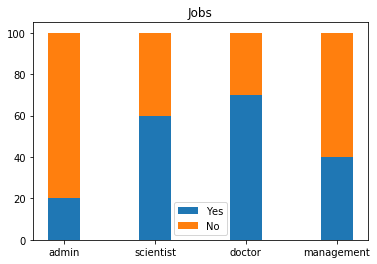

In [19]:
p1 = plt.bar(ind, jobYes, width=0.35)
p2 = plt.bar(ind, jobNo, width=0.35, bottom=jobYes)

plt.xticks(ind, jobList)
plt.yticks=(np.arange(0, 100, 10))

plt.legend((p1[0], p2[0]), ('Yes', 'No'))
           
plt.title('Jobs');

## Final

In [23]:
filter_mask = data['y'] == 'yes'
bankSub = data[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

alt.Chart(bankSub).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [25]:
ageTot = data.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [26]:
ageProp = data.groupby(['age', 'y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [27]:
ageComb = pd.merge(ageProp, ageTot, left_on=['age'], right_on=['age'])
ageComb['catProp'] = (ageComb.ageCat / ageComb.ageTot) * 100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [28]:
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [3]:
data.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [4]:
data.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [5]:
np.quantile(data['balance'], [0.25, 0.50, 0.75])

array([  72.,  448., 1428.])

In [6]:
data['balanceClass'] = 'Quant1'
data.loc[(data['balance'] > 72) & (data['balance'] < 448), 'balanceClass'] = 'Quant2'
data.loc[(data['balance'] > 448) & (data['balance'] < 1428), 'balanceClass'] = 'Quant3'
data.loc[(data['balance'] > 1428), 'balanceClass'] = 'Quant4'
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [7]:
balanceTot = data.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [8]:
balanceProp = data.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [9]:
balanceComb = pd.merge(balanceProp, balanceTot, on=['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot) * 100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


In [10]:
X = data[['balance']].values.astype(float)

In [11]:
scaler = preprocessing.MinMaxScaler()

In [12]:
data['balanceTran'] = scaler.fit_transform(X)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


In [13]:
data['balanceTran'] = data['balanceTran'] + 0.001

In [14]:
data['loanTran'] = 1
data.loc[data['loan'] == 'no', 'loanTran'] = 5
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.093259,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.074067,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.073822,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.087476,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.073812,5


In [15]:
data['houseTran'] = 5

In [16]:
data.loc[data['housing'] == 'no', 'houseTran'] = 1
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Quant4,0.093259,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Quant1,0.074067,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Quant1,0.073822,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Quant4,0.087476,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Quant1,0.073812,5,1


In [17]:
data['assetIndex'] = data['balanceTran'] * data['loanTran'] * data['houseTran']
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.093259,5,5,2.331484
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.074067,5,5,1.851666
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073822,1,5,0.369108
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.087476,5,5,2.186903
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.073812,5,1,0.369062


In [18]:
np.quantile(data['assetIndex'], [0.25, 0.5, 0.75])

array([0.38163646, 0.57415367, 1.9274749 ])

In [19]:
print(data.dtypes)
data.describe()

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
dtype: object


,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.086171,4.359094,3.223353,1.192980
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.027643,1.467280,1.987511,0.961228
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.001000,1.000000,1.000000,0.001000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.074457,5.000000,1.000000,0.381636
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.077871,5.000000,5.000000,0.574154
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.086768,5.000000,5.000000,1.927475
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.001000,5.000000,5.000000,15.132902


In [20]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'
data1 = pd.read_csv(file_url, sep=";")

In [21]:
data1Numeric = data1[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

In [22]:
set_option('display.width', 150)
set_option('precision', 3)
corr = data1Numeric.corr(method='pearson')
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


In [27]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.093,5,5,2.331
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.074,5,5,1.852
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,Quant1,0.074,1,5,0.369
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,Quant4,0.087,5,5,2.187
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,Quant1,0.074,5,1,0.369


In [28]:
data.skew()

age             0.685
balance         8.360
day             0.093
duration        3.144
campaign        4.899
pdays           2.616
previous       41.846
balanceTran     8.360
loanTran       -1.853
houseTran      -0.225
assetIndex      1.195
dtype: float64

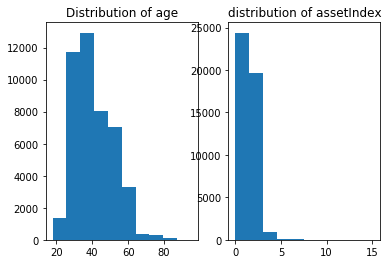

In [30]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(data['age'])
ax[0].set_title('Distribution of age')

ax[1].hist(data['assetIndex'])
ax[1].set_title('distribution of assetIndex');

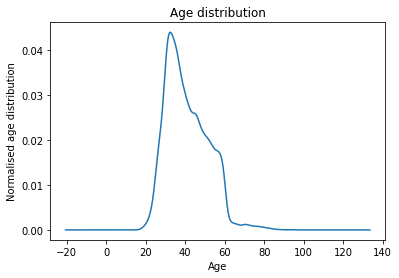

In [31]:
data['age'].plot(kind = 'density')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

In [35]:
scaling = StandardScaler().fit(data1Numeric)
rescaledNum = scaling.transform(data1Numeric)
set_printoptions(precision=3)
rescaledNum

array([[ 1.607,  0.256, -1.298, ..., -0.569, -0.411, -0.252],
       [ 0.289, -0.438, -1.298, ..., -0.569, -0.411, -0.252],
       [-0.747, -0.447, -1.298, ..., -0.569, -0.411, -0.252],
       ...,
       [ 2.925,  1.43 ,  0.143, ...,  0.722,  1.436,  1.05 ],
       [ 1.513, -0.228,  0.143, ...,  0.399, -0.411, -0.252],
       [-0.371,  0.528,  0.143, ..., -0.247,  1.476,  4.524]])

In [36]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(data1Numeric)
normNum = norm.transform(data1Numeric)
set_printoptions(precision = 3)
normNum

array([[ 2.686e-02,  9.923e-01,  2.315e-03, ...,  4.630e-04, -4.630e-04,
         0.000e+00],
       [ 2.750e-01,  1.812e-01,  3.125e-02, ...,  6.249e-03, -6.249e-03,
         0.000e+00],
       [ 3.974e-01,  2.408e-02,  6.021e-02, ...,  1.204e-02, -1.204e-02,
         0.000e+00],
       ...,
       [ 1.235e-02,  9.805e-01,  2.917e-03, ...,  8.579e-04,  3.157e-02,
         5.147e-04],
       [ 6.775e-02,  7.940e-01,  2.021e-02, ...,  4.754e-03, -1.189e-03,
         0.000e+00],
       [ 1.234e-02,  9.906e-01,  5.668e-03, ...,  6.669e-04,  6.269e-02,
         3.668e-03]])